In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [7]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import auc, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
import random
from scipy.stats import sem, t
from scipy import mean


from SepMe.ml.vis import plot_violins

In [4]:
df = pd.read_csv('df_clean.csv')
df['category'] = ['sep_level_' + str(row) for i,row in df['expert_rating'].items()]

df

,filename,type,phase,WorkerId,SubmitTime,human_rating,expert_name,expert_rating,as_0.02_ce,as_0.02_cp,...,knn_6.0_cp,knn_6.0_ltcc,knn_8.0_ce,knn_8.0_cp,knn_8.0_ltcc,class,interval_3,interval_5,interval_10,category
0,JavierGeneratedData_3dinterleaved_4classes_PCA,semantic,training,A3329OQT52I6TJ,Fri Dec 06 06:55:32 PST 2019,0.83,M,4,0.165507,0.862239,...,0.892405,0.987342,0.119498,0.878165,1.0,1,"[0.66,1.0]","[0.75,1.0]","[0.8,0.9]",sep_level_4
1,JavierGeneratedData_3dinterleaved_4classes_PCA,semantic,training,A3329OQT52I6TJ,Fri Dec 06 06:55:32 PST 2019,0.83,A,5,0.165507,0.862239,...,0.892405,0.987342,0.119498,0.878165,1.0,1,"[0.66,1.0]","[0.75,1.0]","[0.8,0.9]",sep_level_5
2,JavierGeneratedData_3dinterleaved_4classes_PCA,semantic,training,A3KJLFLYW65ULO,Fri Dec 06 06:57:27 PST 2019,0.57,M,4,0.165507,0.862239,...,0.892405,0.987342,0.119498,0.878165,1.0,1,"[0.33,0.66]","[0.5,0.75]","[0.5,0.6]",sep_level_4
3,JavierGeneratedData_3dinterleaved_4classes_PCA,semantic,training,A3KJLFLYW65ULO,Fri Dec 06 06:57:27 PST 2019,0.57,A,5,0.165507,0.862239,...,0.892405,0.987342,0.119498,0.878165,1.0,1,"[0.33,0.66]","[0.5,0.75]","[0.5,0.6]",sep_level_5
4,JavierGeneratedData_3dinterleaved_4classes_PCA,semantic,training,A2V4MJKK1NIUQ9,Fri Dec 06 07:01:59 PST 2019,0.45,M,4,0.165507,0.862239,...,0.892405,0.987342,0.119498,0.878165,1.0,1,"[0.33,0.66]","[0.25,0.5]","[0.4,0.5]",sep_level_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35395,worldmap_RobPCA,abstract,task,A1TIO97G4K0ZFF,Sat Nov 30 10:37:12 PST 2019,0.08,A,3,0.160424,0.733333,...,0.500000,1.000000,0.415752,0.464286,1.0,4,"[0,0.33]","[0,0.25]","[0.0,0.1]",sep_level_3
35396,worldmap_RobPCA,abstract,task,A29VL3MZE7YPBZ,Mon Dec 02 05:39:54 PST 2019,0.95,M,3,0.160424,0.733333,...,0.500000,1.000000,0.415752,0.464286,1.0,4,"[0.66,1.0]","[0.75,1.0]","[0.0,0.1]",sep_level_3
35397,worldmap_RobPCA,abstract,task,A29VL3MZE7YPBZ,Mon Dec 02 05:39:54 PST 2019,0.95,A,3,0.160424,0.733333,...,0.500000,1.000000,0.415752,0.464286,1.0,4,"[0.66,1.0]","[0.75,1.0]","[0.0,0.1]",sep_level_3
35398,worldmap_RobPCA,abstract,task,A2V4CKDV6TKXQ0,Sat Nov 30 13:56:45 PST 2019,0.76,M,3,0.160424,0.733333,...,0.500000,1.000000,0.415752,0.464286,1.0,4,"[0.66,1.0]","[0.75,1.0]","[0.7,0.8]",sep_level_3


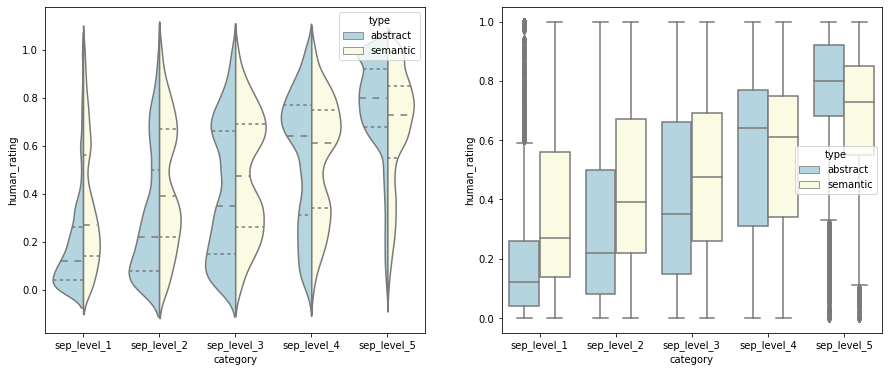

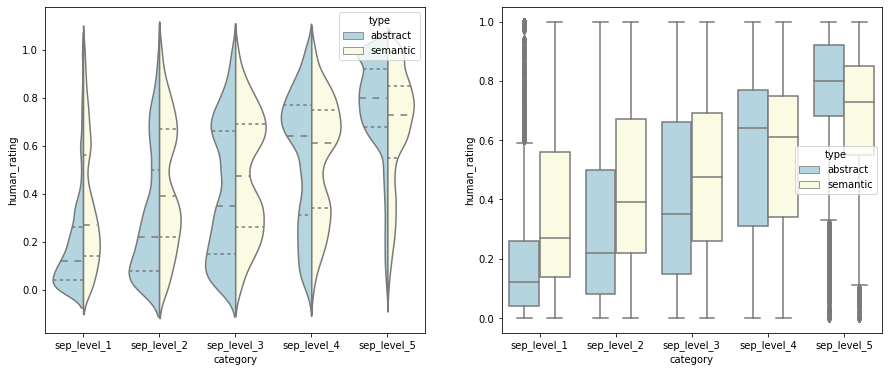

In [5]:
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df,ax, x='category', y="human_rating", hue="type")

f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df,ax, x='category', y="human_rating", hue="type")

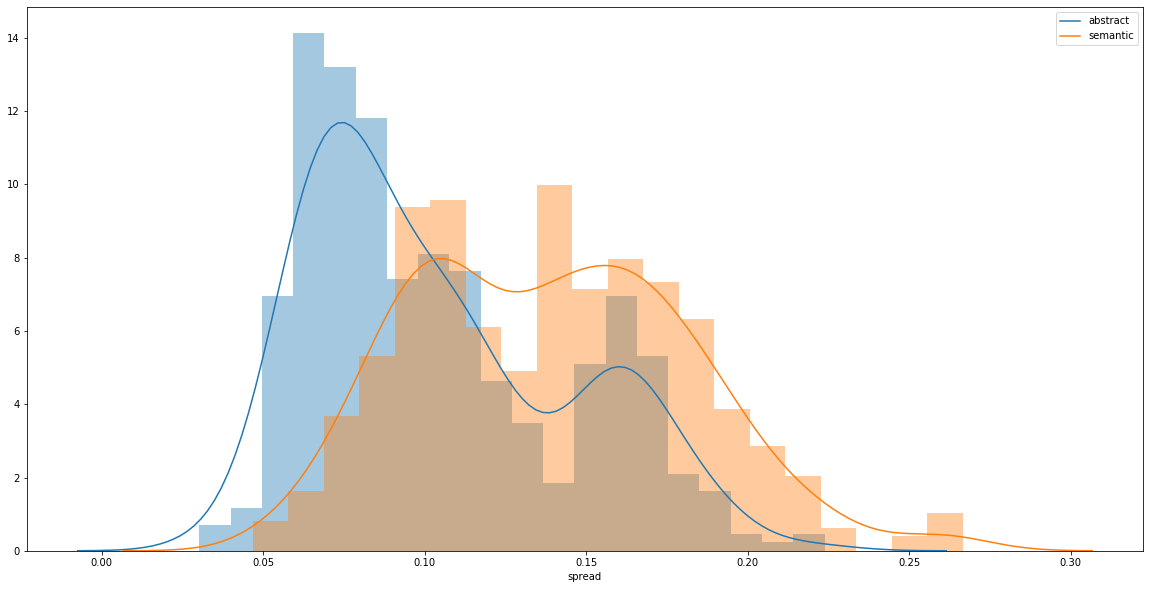

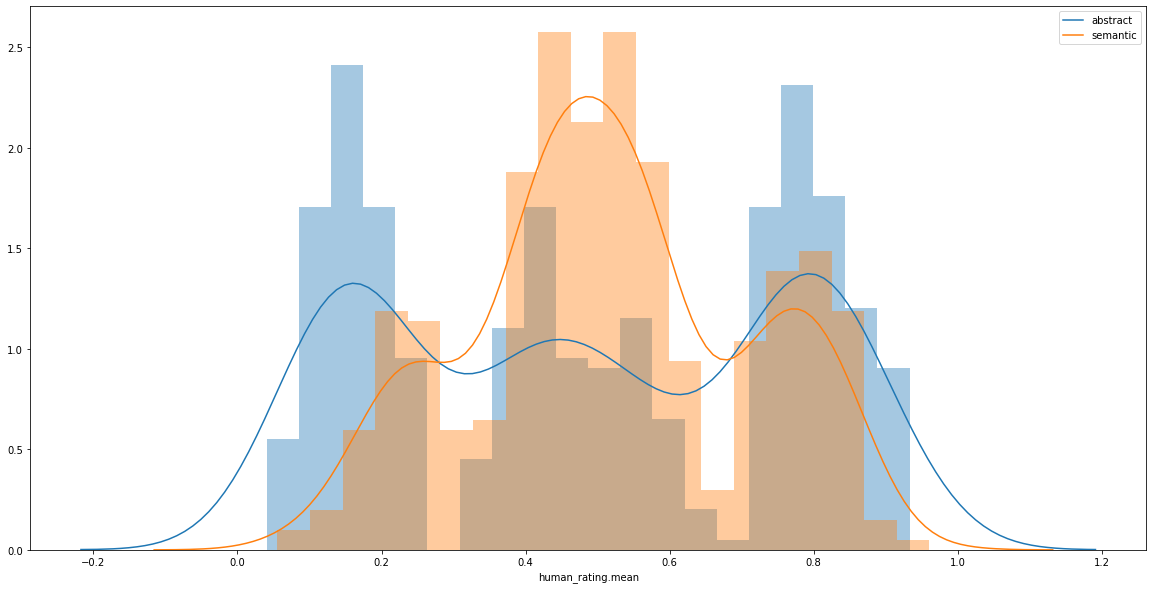

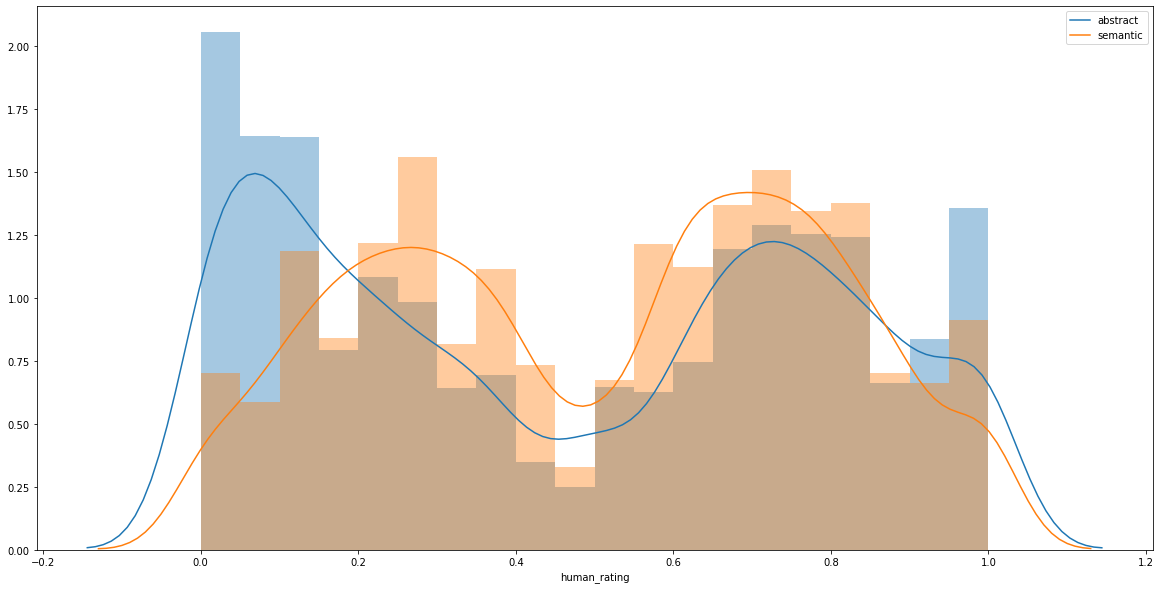

In [22]:
df_agg = pd.read_csv('df_dr.csv')
df1 = df_agg.loc[df_agg['type']=='abstract']
df2 = df_agg.loc[df_agg['type']=='semantic']
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df1.spread, bins=20, kde_kws={"label": "abstract"})
sns.distplot(df2.spread, bins=20, kde_kws={"label": "semantic"})


fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df1['human_rating.mean'], bins=20, kde_kws={"label": "abstract"})
sns.distplot(df2['human_rating.mean'], bins=20, kde_kws={"label": "semantic"})


df1 = df.loc[df['type']=='abstract']
df2 = df.loc[df['type']=='semantic']


fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df1['human_rating'], bins=20, kde_kws={"label": "abstract"})
sns.distplot(df2['human_rating'], bins=20, kde_kws={"label": "semantic"})


,filename,type,class,human_rating.mean,human_rating.count,human_rating.sem,expert_rating.first,expert_rating.last,expert_rating.mean,human_rating,...,interval_10,PCA_1,TSNE_1,PCA_2,TSNE_2,PCA_3,PCA_4,PCA_5,expert_rating.cat,expert_consensus
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,1,0.818667,30,0.021376,5,5,5.0,0.818667,...,"[0.8,0.9]",1.853032,-21.960787,0.398556,24.902020,0.144556,-0.026213,0.010690,sep_level_5,discrepancy_of_0
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,1,0.812000,40,0.014265,5,5,5.0,0.812000,...,"[0.8,0.9]",1.853032,-21.694560,0.398556,25.188091,0.144556,-0.026213,0.010690,sep_level_5,discrepancy_of_0
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,2,0.802500,40,0.019447,5,5,5.0,0.802500,...,"[0.8,0.9]",1.880028,-22.900326,0.429649,24.871943,0.050169,-0.006649,0.040476,sep_level_5,discrepancy_of_0
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,3,0.804000,40,0.015578,5,5,5.0,0.804000,...,"[0.8,0.9]",1.860662,-22.562658,0.444598,26.051176,0.112088,-0.070397,-0.016060,sep_level_5,discrepancy_of_0
4,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,2,0.766667,30,0.020122,5,5,5.0,0.766667,...,"[0.7,0.8]",1.880028,-23.047165,0.429649,25.244331,0.050169,-0.006649,0.040476,sep_level_5,discrepancy_of_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,yeast_PCA,semantic,1,0.483750,32,0.051077,1,1,1.0,0.483750,...,"[0.4,0.5]",-1.869965,35.882656,0.446099,-21.936886,0.527367,0.068599,0.156599,sep_level_1,discrepancy_of_0
888,yeast_PCA,abstract,4,0.176562,64,0.019537,1,1,1.0,0.176562,...,"[0.1,0.2]",-2.965185,30.025135,0.329452,-33.534367,-0.602338,0.324182,-0.118977,sep_level_1,discrepancy_of_0
889,yeast_PCA,abstract,3,0.152000,60,0.015675,1,1,1.0,0.152000,...,"[0.1,0.2]",-2.047838,27.968142,-0.005154,-19.226904,-0.097139,-0.274046,-0.243539,sep_level_1,discrepancy_of_0
890,yeast_PCA,abstract,2,0.172963,54,0.021553,1,1,1.0,0.172963,...,"[0.1,0.2]",-1.930844,28.712027,-0.115132,-17.947956,0.115566,-0.031847,-0.143009,sep_level_1,discrepancy_of_0


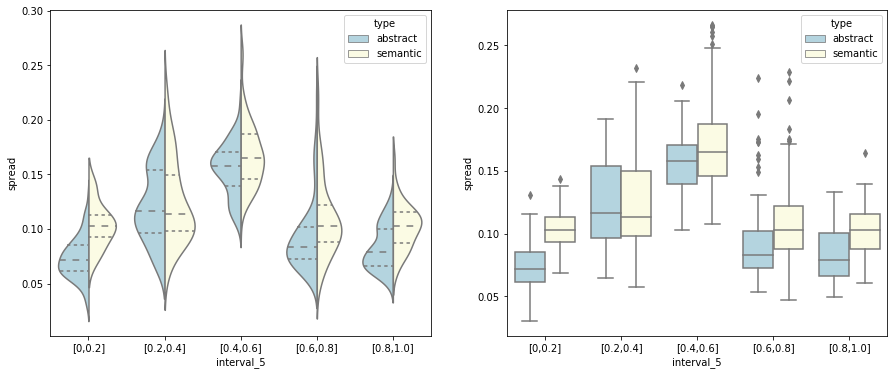

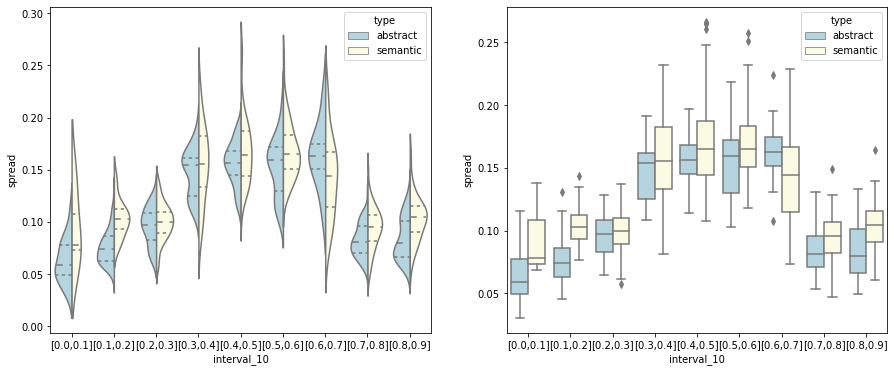

In [24]:
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_agg,ax,x='interval_5', y='spread', hue='type')

f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_agg,ax,x='interval_10', y='spread', hue='type')


df_agg

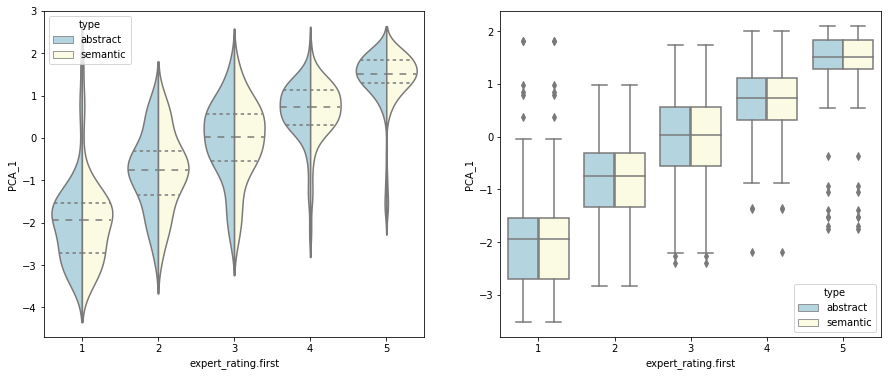

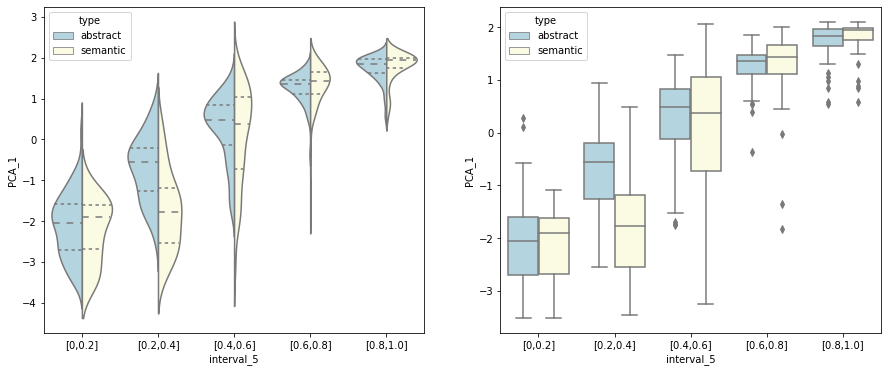

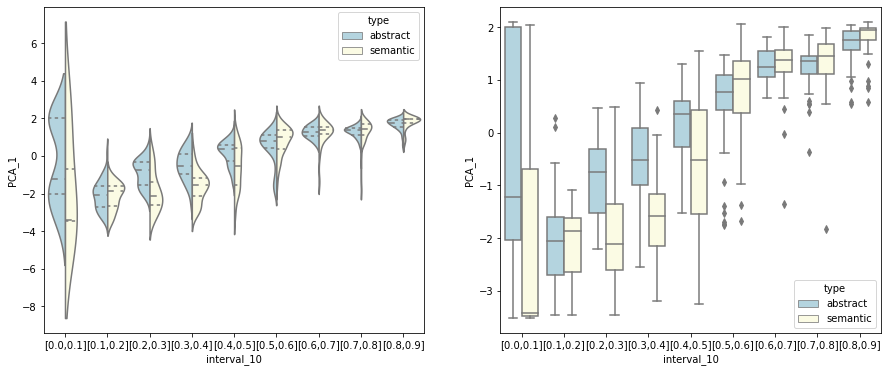

In [21]:
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_agg, ax, x = 'expert_rating.first', y = "PCA_1", hue="type")
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_agg, ax, x = 'interval_5', y = "PCA_1", hue="type")
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_agg, ax, x = 'interval_10', y = "PCA_1", hue="type")